Chapter 21

# 正定性
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码首先定义了一个二次函数 
$$f(x_1, x_2) = x^T A x$$
其中 
$$A = \begin{bmatrix} 1.5 & 0.5 \\ 0.5 & 1.5 \end{bmatrix}$$
是控制函数形状的矩阵。函数通过矩阵运算得到二次形式的解析表达式 $f(x_1, x_2) = 1.5 x_1^2 + x_1 x_2 + 1.5 x_2^2$，并计算出该函数的梯度，形成向量场。梯度的计算确保了在每个点 $(x_1, x_2)$ 处都可得到目标函数的最大增长方向，符合二次函数的对称性。

代码接着生成一系列网格点，以便在这些点上计算函数值和梯度向量场，并在 3D 和 2D 图上展示结果。3D 图展示了 $f(x_1, x_2)$ 的曲面图，利用线框和等高线将函数的形状表现得更加清晰；等高线展示函数值的水平分布，便于观察函数随 $x_1$ 和 $x_2$ 的变化情况。对于 2D 图，代码通过在网格上绘制梯度矢量场，展示函数在不同点的上升方向和速度。每个梯度矢量的方向和长度与该点函数增长的快慢成正比。矢量场的颜色表示梯度强度，便于对函数变化的局部特性进行分析。

In [1]:
import sympy  # 导入符号计算库 sympy
import numpy as np  # 导入 numpy 库用于数值计算
import matplotlib.pyplot as plt  # 导入 matplotlib 库用于绘图

## 定义函数生成圆形网格

In [2]:
def mesh_circ(c1, c2, r, num):  # mesh_circ 用于生成圆形网格
    theta = np.arange(0, 2 * np.pi + np.pi / num, np.pi / num)  # 角度数组
    r = np.arange(0, r, r / num)  # 半径数组
    theta, r = np.meshgrid(theta, r)  # 生成角度和半径的网格
    xx1 = np.cos(theta) * r + c1  # 计算 x 坐标
    xx2 = np.sin(theta) * r + c2  # 计算 y 坐标
    return xx1, xx2  # 返回坐标网格

## 定义符号变量和二次函数

In [3]:
x1, x2 = sympy.symbols('x1 x2')  # 定义符号变量 x1 和 x2

In [4]:
A = np.array([[1.5, 0.5], 
              [0.5, 1.5]])  # 定义二次函数的系数矩阵 A

In [5]:
x = np.array([[x1, x2]]).T  # 符号变量构成的列向量

In [6]:
f_x = x.T @ A @ x  # 计算二次函数 f(x) = x^T A x

In [7]:
f_x = f_x[0][0]  # 提取函数表达式
f_x # 输出二次函数的符号表达式

x1*(1.5*x1 + 0.5*x2) + x2*(0.5*x1 + 1.5*x2)

## 计算梯度

In [8]:
grad_f = [sympy.diff(f_x, var) for var in (x1, x2)]  # 计算二次函数的梯度
grad_f  # 输出梯度的符号表达式

[3.0*x1 + 1.0*x2, 1.0*x1 + 3.0*x2]

In [9]:
f_x_fcn = sympy.lambdify([x1, x2], f_x)  # 将符号函数转化为 lambda 函数，便于数值计算

## 将梯度转化为适用于 numpy 的双变量 lambda 函数

In [10]:
grad_fcn = sympy.lambdify([x1, x2], grad_f)  # 将梯度转化为 lambda 函数

## 创建网格数据

In [11]:
xx1, xx2 = mesh_circ(0, 0, 4, 20)  # 生成用于绘制 3D 图像的细网格
xx1_, xx2_ = mesh_circ(0, 0, 4, 10)  # 生成用于绘制梯度场的粗网格

In [12]:
V = grad_fcn(xx1_, xx2_)  # 计算粗网格上每个点的梯度

In [13]:
V_z = np.ones_like(V[1])  # 生成单位 z 分量用于 3D 矢量

In [14]:
# 检查梯度是否包含整数，并进行相应处理
if isinstance(V[1], int):
    V[1] = np.zeros_like(V[0])
elif isinstance(V[0], int):
    V[0] = np.zeros_like(V[1])

ff_x = f_x_fcn(xx1, xx2)  # 计算细网格上每个点的二次函数值

In [15]:
color_array = np.sqrt(V[0]**2 + V[1]**2)  # 计算颜色数组，用于根据梯度大小上色

In [16]:
l_3D_vectors = np.sqrt(V[0]**2 + V[1]**2 + V_z**2)  # 计算 3D 矢量的长度

## 绘制 3D 图像

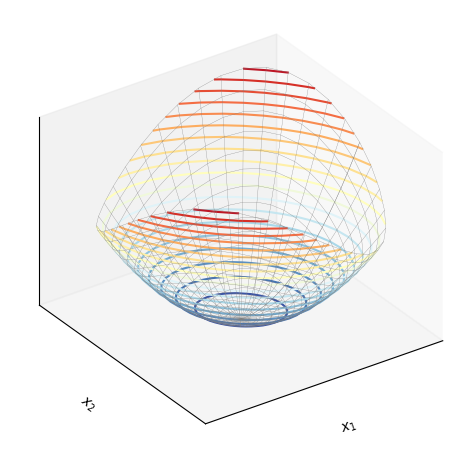

In [17]:
ax = plt.figure().add_subplot(projection='3d')  # 创建 3D 图像
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, cstride=1, color=[0.5, 0.5, 0.5], linewidth=0.2)  # 绘制线框
ax.contour3D(xx1, xx2, ff_x, 20, cmap='RdYlBu_r')  # 绘制 3D 等高线

# 设置坐标轴参数
ax.xaxis.set_ticks([])  # 隐藏 x 轴刻度
ax.yaxis.set_ticks([])  # 隐藏 y 轴刻度
ax.zaxis.set_ticks([])  # 隐藏 z 轴刻度
plt.xlim(xx1.min(), xx1.max())  # 设置 x 轴范围
plt.ylim(xx2.min(), xx2.max())  # 设置 y 轴范围
ax.set_proj_type('ortho')  # 设置投影类型为正交
ax.view_init(30, -125)  # 设置视角角度
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签
plt.tight_layout()  # 调整布局

## 绘制 2D 图像和梯度场

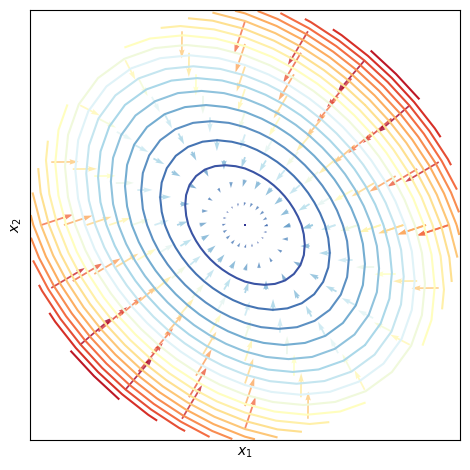

In [18]:
fig, ax = plt.subplots()  # 创建 2D 图像
plt.quiver(xx1_, xx2_, -V[0], -V[1], color_array, angles='xy', scale_units='xy', edgecolor='none', alpha=0.8, cmap='RdYlBu_r')  # 绘制梯度场

plt.contour(xx1, xx2, ff_x, 20, cmap='RdYlBu_r')  # 绘制等高线

ax.set_aspect('equal')  # 设置图形纵横比
ax.xaxis.set_ticks([])  # 隐藏 x 轴刻度
ax.yaxis.set_ticks([])  # 隐藏 y 轴刻度
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
plt.tight_layout()  # 调整布局